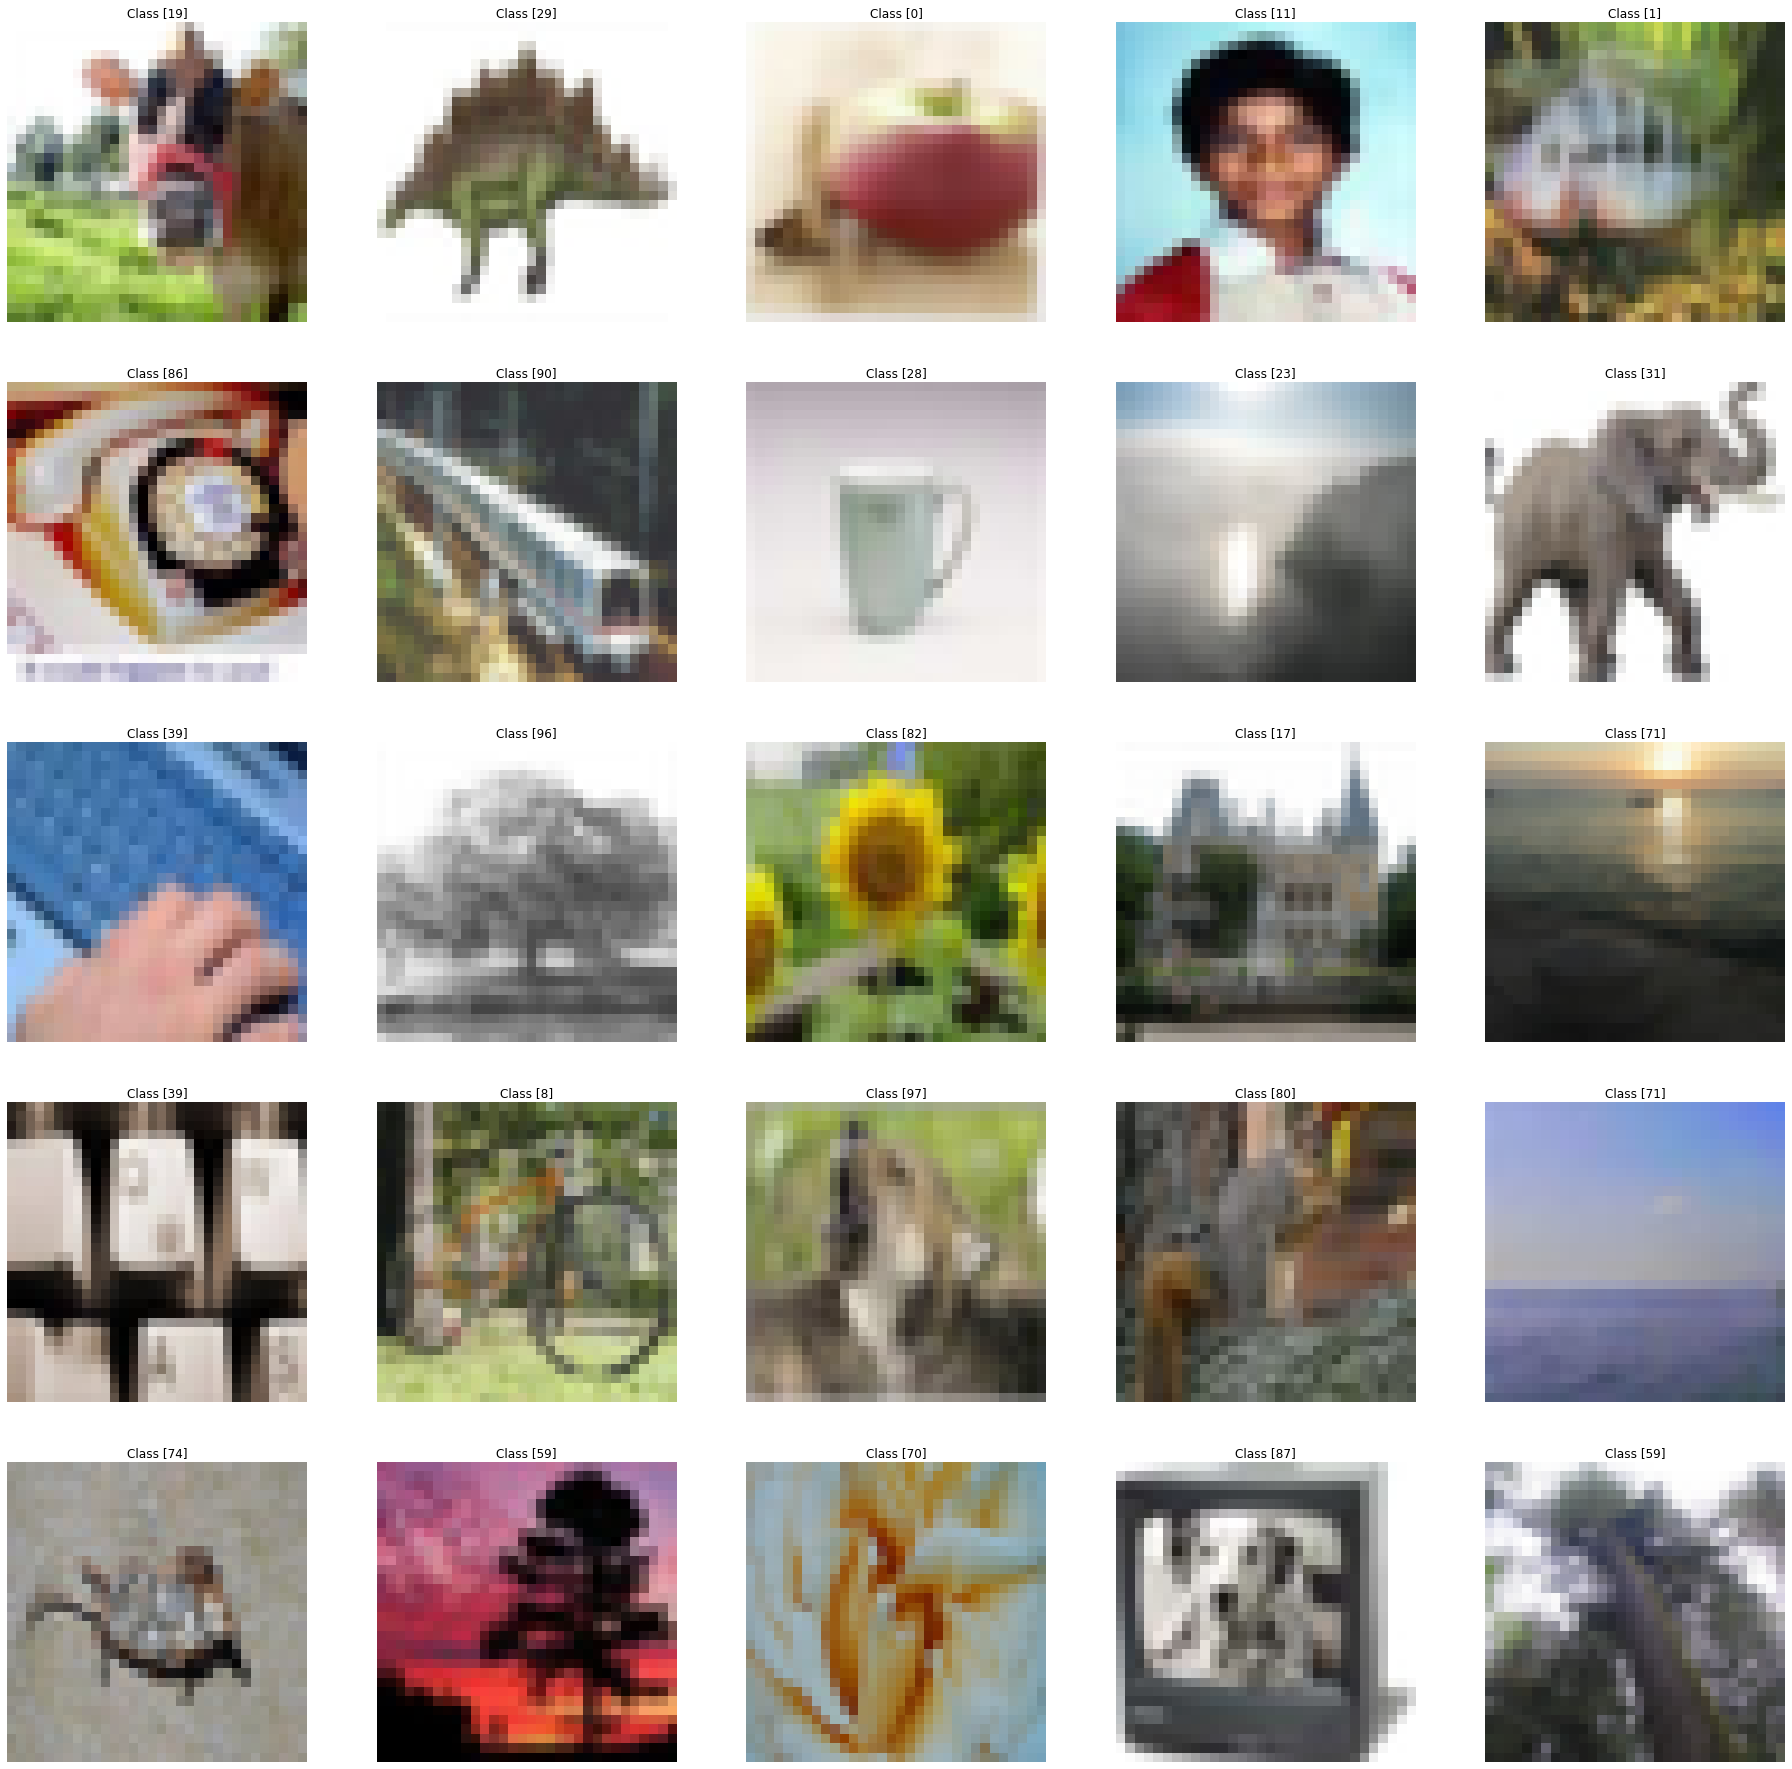

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar100

# Charger les données CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Vérifier les formes des données
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

plt.rcParams['figure.figsize'] = (32,32) # Make the figures a bit bigger
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.axis('off')
    plt.title("Class {}".format(y_train[i]))

In [8]:
print(" Type de structure de données des images : {}".format(type(x_train)))
print(" Type de structure de données des labels : {}".format(type(y_train)))

print(" Forme des images d'entrainement encodées sous forme de tableaux numpy :  {}".format(x_train.shape))
print(" Longueur des labels associés : {}".format(len(y_train)))

print(" Forme des images de test encodées sous forme de tableaux numpy :  {}".format(x_test.shape))
print(" Longueur des labels associés : {}".format(len(y_test)))

print(" Forme d'une image : {}".format(x_train[0].shape))
print(" Exemple d'image : \n {}".format(x_train[0]))

 Type de structure de données des images : <class 'numpy.ndarray'>
 Type de structure de données des labels : <class 'numpy.ndarray'>
 Forme des images d'entrainement encodées sous forme de tableaux numpy :  (50000, 32, 32, 3)
 Longueur des labels associés : 50000
 Forme des images de test encodées sous forme de tableaux numpy :  (10000, 32, 32, 3)
 Longueur des labels associés : 10000
 Forme d'une image : (32, 32, 3)
 Exemple d'image : 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [195 205 193]
  [212 224 204]
  [182 194 167]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [170 176 150]
  [161 168 130]
  [146 154 113]]

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [189 199 169]
  [166 178 130]
  [121 133  87]]

 ...

 [[148 185  79]
  [142 182  57]
  [140 179  60]
  ...
  [ 30  17   1]
  [ 65  62  15]
  [ 76  77  20]]

 [[122 157  66]
  [120 155  58]
  [126 160  71]
  ...
  [ 22  16   3]
  [ 97 112  56]
  [141 161  87]]

 [[ 87 122  41]
  [ 88 122  39]

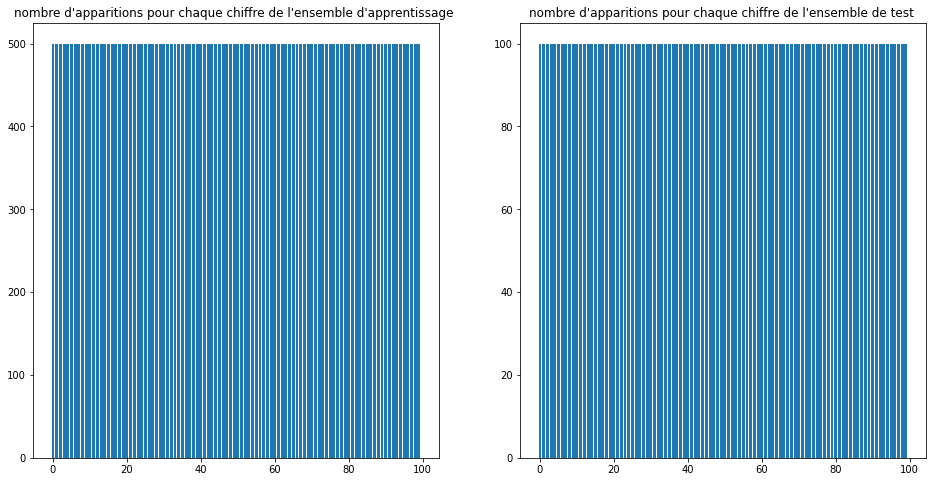

In [9]:
train_counts=[]
test_counts=[]
for i in range(0,100):
  train_counts.append(len([k for k in y_train if k ==i]))
  test_counts.append(len([k for k in y_test if k ==i ]))

  
plt.rcParams['figure.figsize'] = (16,8) # Make the figures a bit bigger
fig,(ax1,ax2,) = plt.subplots(1,2)

x = range(0,100)
ax1.bar(x,train_counts)
ax1.set_title("nombre d'apparitions pour chaque chiffre de l'ensemble d'apprentissage ")


ax2.bar(x,test_counts)
ax2.set_title("nombre d'apparitions pour chaque chiffre de l'ensemble de test ")



plt.show()


In [10]:
x_train = x_train.reshape((50000, 32, 32, 3))
x_train = x_train.astype('float32') / 255 
x_test = x_test.reshape((10000, 32, 32, 3))
x_test = x_test.astype('float32')/255


In [11]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 100) 
y_test = to_categorical(y_test, num_classes = 100)


In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Flatten(input_shape=(32, 32, 3)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(128, activation='LeakyReLU'))
network.add(layers.Dense(100, activation='softmax'))

network.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics =['accuracy'])

network.summary()
epochs = 20
batch_size = 128

history = network.fit(x_train,y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_test, y_test))



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               307300    
                                                                 
 dense_7 (Dense)             (None, 128)               12928     
                                                                 
 dense_8 (Dense)             (None, 100)               12900     
                                                                 
Total params: 333,128
Trainable params: 333,128
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 8s 18ms/step - loss: 4.1903 - accuracy: 0.0574 - val_loss: 3.9411 - val_accuracy: 0.0943
Epoch 2/20
391/391 [=================

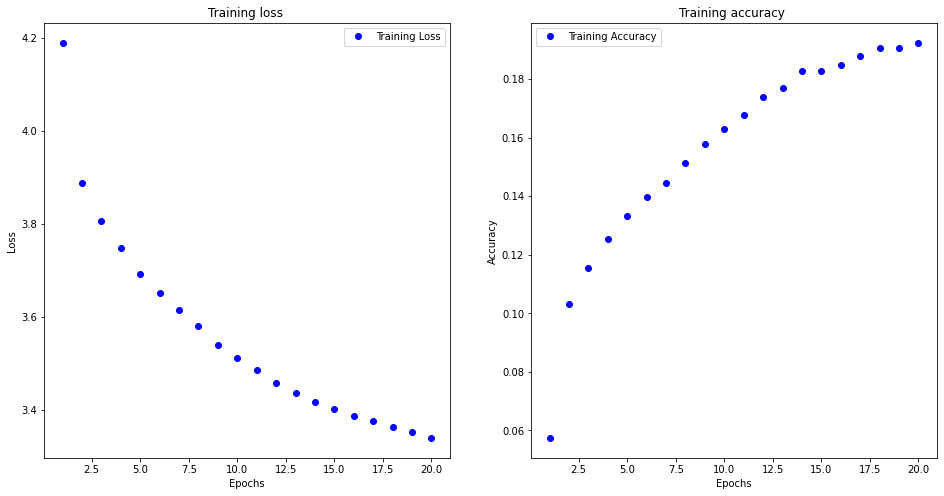

In [15]:
history_dict = history.history 
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']
plt.rcParams['figure.figsize'] = (16,8) # Make the figures a bit bigger
fig,(ax1,ax2,) = plt.subplots(1,2)

x = range(1,epochs+1)
ax1.plot(x,loss_values,'bo',label='Training Loss')
ax1.set_title('Training loss ')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()


ax2.plot(x,acc_values,'bo',label='Training Accuracy')
ax2.set_title('Training accuracy ')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

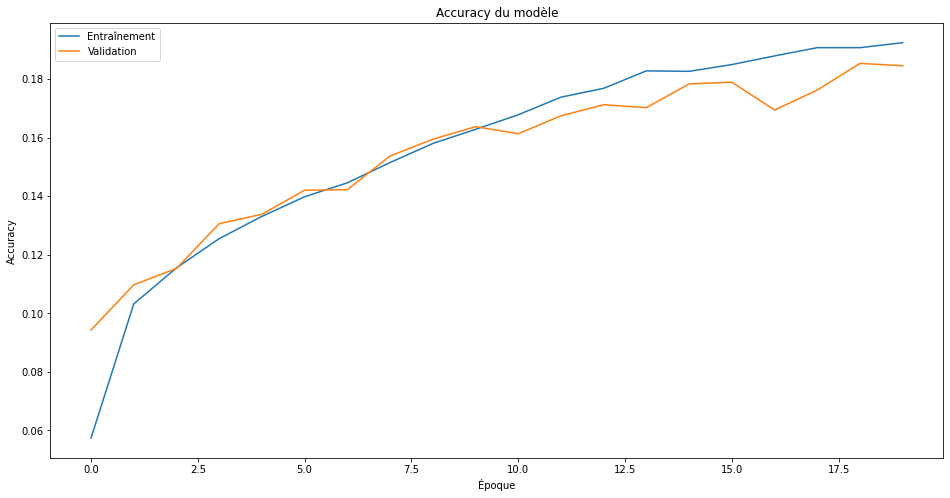

In [16]:
# Affichage du suivi de l’entraînement  

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy du modèle')
plt.ylabel('Accuracy')
plt.xlabel('Époque')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()
